In [ ]:
!conda info


In [ ]:
!jt -l


In [ ]:
!jt -t gruvboxd

In [ ]:
# Creating Main Window
main_window = tk.Tk()
main_window.title("Main Window")
main_window.geometry("900x500")
main_window.resizable(True, True)


# Left Canvas
canvas_left = tk.Canvas(main_window, bg="GhostWhite", width=600, height=500)
canvas_left.grid(row=0, column=0, sticky="nsew")

image_bck = PhotoImage(file="ed-howell-flow-graph_sm.png")

image_id = canvas_left.create_image(
    canvas_left.winfo_reqwidth() // 2,
    canvas_left.winfo_reqheight() // 2,
    image=image_bck,
)

text_id = canvas_left.create_text(
    canvas_left.winfo_reqwidth() // 2,
    4 * canvas_left.winfo_reqheight() // 5,
    text="This is a product developed by Student S.A. All rights reserved",
    font=("Arial", 8),
    fill="white",
)

# Right Canvas
canvas_right = tk.Canvas(
    main_window,
    bg=main_colour,
    width=300,
    height=500,
)
canvas_right.grid(row=0, column=1, sticky="nsew")

# Add text objects on the right canvas
text1_id = canvas_right.create_text(
    2*canvas_right.winfo_reqwidth() // 7,
    5 * canvas_right.winfo_reqheight() // 15,
    text="Parameters Data File",
    font=("Arial", 12),
)

open_file_1_button = tk.Button(canvas_right, text="Select File 1", command=select_file)
open_file_1_button.place(
    x=(5*canvas_right.winfo_reqwidth() // 7),
    y=(6 * canvas_right.winfo_reqheight() // 15),
)

text2_id = canvas_right.create_text(
    canvas_right.winfo_reqwidth() // 7,
    9 * canvas_right.winfo_reqheight() // 15,
    text="Antenna Data File",
    font=("Arial", 12),
)

open_file_2_button = tk.Button(
    canvas_right,
    text="Select File 2",
    command=select_file,
)
open_file_2_button.place(
    x=(canvas_right.winfo_reqwidth() // 7),
    y=(10 * canvas_right.winfo_reqheight() // 15),
)

# Create a button on the right canvas
load_button = tk.Button(
    canvas_right,
    text="Load",
    command=on_button_click,
    background="white",
    foreground="black",
    activebackground="lightgrey",
    width=13,
    height=1,
    border=1,
    font=("Arial", 9, "bold"),
)

load_button.place(
    x=(2 * canvas_right.winfo_reqwidth() // 5),
    y=(12 * canvas_right.winfo_reqheight() // 15),
)

# rows
main_window.grid_rowconfigure(0, weight=1)

# columns
main_window.grid_columnconfigure(0, weight=1)
main_window.grid_columnconfigure(1, weight=1)

main_window.update_idletasks()

In [ ]:
def select_file():
    filetypes = (
        ('Data Files', '*.csv'),
        #('All files', '*.*')
    )

    filename = fd.askopenfilename(
        title='Open a file',
        initialdir='/',
        filetypes=filetypes)

    showinfo(
        title='Selected File',
        message= 'File not selected' 
    )


In [ ]:
# # Convert Raw Data a Structureds  JSON
# Parameter Raw Data a Structured JSON

def save_parameter_data(df): 
    global dict_parameter 
    dict_parameter = {}
    services_dict = {}
    dservices_dict = {}
    for index in df.index: 
        for i in range(31):
            key = df.loc[index, f'SId {i+1} (Hex)']
            print(f'for  INDEX  {index}: The KEY in in this indesxx es {key} AND ITS TYPE IS {type(key)} ')
            if not key == '':
                services_dict[key] = {
                'ServID': df.loc[index,f'SId {i+1} (Hex)'],
                'Label': df.loc[index,f'Serv Label{i+1} '],
                'LSN': df.loc[index,f'LSN {i+1} (Hex)'] 
                }
        for i in range(14):
            key = df.loc[index, f'Data SId {i+1} (Hex)']
            if not key == '':
                dservices_dict[key] = {
                'DServID':df.loc[index, f'Data SId {i+1} (Hex)'],
                'Data Service Label':df.loc[index, f'Data Serv Label{i+1}'],
                }
    for index in df.index: 
        dict_parameter[df.loc[index, 'id']] ={
            'ID': df.loc[index, 'id'],
            'Date': df.loc[index, 'Date'],
            'Ensemble ID': df.loc[index, 'EID'],
            'Ensemble': df.loc[index, 'Ensemble'],
            'Ensemble Area': df.loc[index, 'Ensemble Area'],
            'Licence': df.loc[index, 'Licence'],
            'Transmitter Area': df.loc[index, 'Transmitter Area'],
            'Site': df.loc[index, 'Site'],
            'Frequency': df.loc[index, 'Freq.'],
            'Block': df.loc[index, 'Block'],
            'TII Main ID': df.loc[index, 'TII Main Id (Hex)'],
            'TII Sub ID': df.loc[index, 'TII Sub Id (Hex)'],
            #'Services': services_dict,
            #'Data Services': dservices_dict
        }

    print("\n\nRe-estructuring Parameter Data dictionary")
    first_key = next(iter(dict_parameter))
    first_value = next(iter(dict_parameter.values()))
    print("\nPrinting the first element of Parameter Data")
    pprint(first_key)
    pprint(first_value)
    
    #Creating a JSON dictionary         
    with open("Parameter_structured_data.json", "w") as outfile:
        json.dump(dict_parameter, outfile)

In [ ]:
outer_service_columns =[]
inner_service_columns =[]

for i in range(32):
    outer_service_columns.append('Services')
    outer_service_columns.append('Services')
    outer_service_columns.append('Services')
    inner_service_columns.append(f'Serv Label {i+1}')
    inner_service_columns.append(f'SId {i+1} (Hex)')
    inner_service_columns.append(f'LSN {i+1} (Hex)')

print(outer_service_columns)
print(inner_service_columns)
print(len(outer_service_columns))
print(len(inner_service_columns))

In [ ]:
outer_dservice_columns =[]
inner_dservice_columns =[]

for i in range(15):
    outer_dservice_columns.append('Data Services')
    outer_dservice_columns.append('Data Services')
    inner_dservice_columns.append(f'Data Serv Label {i+1}')
    inner_dservice_columns.append( f'Data Serv ID {i+1} (Hex)')

print(outer_dservice_columns)
print(inner_dservice_columns)
print(len(outer_dservice_columns))
print(len(inner_dservice_columns))

In [ ]:
parameter_outer_columns = ['id', 'Date','Ensemble', 'Licence', 'Ensemble Area', 'Ensemble ID', 'Transmitter', 'Site', 'Frequency', 'Block', 'TII Main ID', 'TII Sub, ID' ]
parameter_inner_columns = [None, None, None, None, None, None, None, None, None, None, None, None ]

In [ ]:
parameter_outer_columns = parameter_outer_columns + outer_service_columns + outer_dservice_columns 
parameter_inner_columns = parameter_inner_columns + inner_service_columns + inner_dservice_columns

In [ ]:
print(parameter_outer_columns)
print(len(parameter_outer_columns))
print(parameter_inner_columns)
print(len(parameter_inner_columns))

In [ ]:
total_parameters_columns = [parameter_outer_columns, parameter_inner_columns]

In [ ]:
import pandas as pd
import numpy as np

parameters_raw = pd.read_csv('Data sets\TxParamsDAB.csv', encoding='latin-1', na_values = np.nan)
antenna_raw = pd.read_csv('Data sets\TxAntennaDAB.csv', encoding='latin-1', na_values = np.nan)

In [ ]:
parameters_raw = parameters_raw.set_index('id')
antenna_raw = antenna_raw.set_index('id')

In [ ]:
parameters_raw.head()

In [ ]:
df = parameters_raw

In [ ]:
dfa =antenna_raw

In [ ]:
# Cleaning Parameters Data
for index in df.index:
    print(index)

for column in df:
    value = (df[column].values)
    print(f'The value of the cell named {column} is {value[17]} and its type is {type(value[17])}')


In [ ]:
df = df.replace(np.nan, np.nan)

In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [ ]:
df.loc[746171, ['Date']]

In [ ]:
duplicate_rows_parameter = parameters_raw[parameters_raw.duplicated()]
print("Duplicate Rows in parameters:\n")
print(duplicate_rows_parameter)

In [ ]:
#Format in Site 
df['Site'] = df['Site'].str.title()


In [ ]:
import dataframecleaner as dfc

In [ ]:
new_columns =['NGR', 'Longitude/Latitude', 'Long', 'Lat', 'Site Height',
            'In-Use Ae Ht','In-Use ERP Total','Dir Max ERP', 
            '0','10','20','30','40','50','60','70','80','90',
            '100','110','120','130','140','150','160','170','180','190',
            '200','210','220','230','240','250','260','270','280','290',
            '300','310','320','330','340','350' ]

In [ ]:
dfa = dfa[new_columns]

In [ ]:
# Cleaning Parameters Data
for index in dfa.index:
    print(index)

for column in dfa:
    value = (dfa[column].values)
    print(f'The value of the cell named {column} is {value[23]} and its type is {type(value[23])}')

In [ ]:
#In-Use ERP 
new_values = [ ]
dfa['In-Use ERP Total'] = dfa['In-Use ERP Total'].replace(np.nan, '0')
dfa['In-Use ERP Total'] = dfa['In-Use ERP Total'].str.replace('.', '')
dfa['In-Use ERP Total'] = dfa['In-Use ERP Total'].str.replace(',', '.').astype(float)


In [ ]:
print(dfa['In-Use ERP Total'])

In [ ]:
dfa.head()

In [ ]:
duplicate_rows_antenna = antenna_raw[antenna_raw.duplicated()]
print("Duplicate Rows in antenna:\n")
print(duplicate_rows_antenna)
indexes_to_drop = test_dfa[test_dfa['NGR'].isin(NGR_to_drop)].index
parameters_wo_NGR = test_df.drop(indexes_to_drop)
antenna_wo_NGR = test_dfa.drop(indexes_to_drop)

In [ ]:
radio_data_sel['Date'] = pd.to_datetime(radio_data_sel['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
dfa.to_json(r'C:\Users\herms\Formative_Assignment\saved_antenna_table.json', orient ='index')

In [ ]:
df.rename(columns={'Long': 'Longitude (Decimal)', 
                   'Lat': 'Latitude (Decimal)',
                   'In-Use Ae Ht': 'Aerial Height(m)',
                   'In-Use ERP Total': 'Power(kW)'})

In [ ]:
NGR_to_drop = ['TF 6267 2032', 'SO24411270', 'NT23338724','SU87709110']
new_value = 'TQ29689006'
NGR_to_drop.append(new_value)

In [ ]:
test_df  = pd.read_json('saved_parameter.json', encoding='latin-1', orient ='index')
test_dfa = pd.read_json('saved_antenna.json', encoding='latin-1', orient ='index')

In [ ]:
test_df = parameters_raw
test_dfa = antenna_raw

In [ ]:
print(test_df)

In [ ]:
# EID C18A, C18F, C188
EID_list =['C18A', 'C18F', 'C188']
DAB_selected = test_df[test_df ['EID'].isin(EID_list)]

In [ ]:
DAB_selected

In [ ]:
DAB_selected_indexes = DAB_selected.index

In [ ]:
antenna_selected = test_dfa.loc[DAB_selected_indexes]

In [ ]:
antenna_selected =antenna_selected.rename(columns={'Long': 'Longitude (Decimal)', 
                   'Lat': 'Latitude (Decimal)',
                   'In-Use Ae Ht': 'Aerial Height(m)',
                   'In-Use ERP Total': 'Power(kW)'})

In [ ]:
radio_data_selected = pd.merge(DAB_selected, antenna_selected, left_index = True, right_index =True)

In [ ]:
radio_data_selected

In [ ]:
print(radio_data_selected)

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#colors
main_colour = '#8991DF'
colour2 = '#377FA5'
colour3 = '#4650B3'
colour4 = '#891A99'

In [ ]:
palette = [main_colour, colour2, colour3, colour4]

In [ ]:
def get_correlation(df):

    correlation_data_df = df[['Block', 'Serv Label1 ', 'Serv Label2 ', 'Serv Label3 ', 'Serv label4 ', 'Serv Label10 ']]
    


In [ ]:
#if there is any ‘Freq’, ‘Block’, ‘Serv Label1’, ‘Serv Label2’, ‘Serv Label3’, ‘Serv label4’,’Serv Label10’ 
correlation_data_df = radio_data_selected[['Freq.','Block', 'Serv Label1 ', 'Serv Label2 ', 'Serv Label3 ', 'Serv Label4 ', 'Serv Label10 ']]
correlation_data_df

In [ ]:
data = {
    'Freq.': [229.072, 229.072, 220.352, 220.352],
    'Block': ['12D', '12D', '11C', '11C'],
    'Serv Label1 ': ['Forth One', 'Forth One', 'METRO Radio', 'METRO Radio'],
    'Serv Label2 ': ['FORTH 2', 'FORTH 2', 'Grt Hits N East', 'Grt Hits N East'],
    'Serv Label3 ': ['Heart', 'Heart', 'Smooth Radio', 'Smooth Radio'],
    'Serv Label4 ': ['HITS RADIO UK', 'HITS RADIO UK', 'HITS RADIO UK', 'HITS RADIO UK'],
    'Serv Label10 ': ['Magic Soul', 'Magic Soul', 'Magic Soul', 'Magic Soul'],
}


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_json(r'C:\Users\herms\Formative_Assignment\intercambio.json',encoding='latin-1', orient ='index')


In [ ]:
def get_correlation(df):

    def compute_chi_squared(df_cross_tab):
        expected_cross_tab = df_cross_tab.copy()
        totals_cross_tab = df_cross_tab.copy()
        totals_cross_tab.index = list(df_cross_tab.sum(axis=1))
        totals_cross_tab.columns = list(df_cross_tab.sum(axis=0))
        total_tabs = totals_cross_tab.sum().sum()

        for i, (row_total, row) in enumerate(totals_cross_tab.iterrows(), start=0):
            for j, (col_total, value) in enumerate(row.items(), start=0):
                expected_val = (col_total*row_total)/total_tabs
                #print(f'Col_Total = {col_total} * Row_Total = {row_total} Expected = {expected_val}')
                expected_cross_tab.iat[i, j] = expected_val
                #print(f'j is{j}')
            #print(i)
        chi_sq = ((df_cross_tab.sub(expected_cross_tab, fill_value=0))**2/expected_cross_tab).sum().sum()
        return chi_sq

    def compute_cramers_v(table, chi_sq):
        n = table.sum().sum()
        phi_sq = chi_sq / n
        r, k = table.shape
        phi_sq_corr = max(0, phi_sq  - ((k - 1) * (r - 1)) / (n - 1))
        r_corr = r - ((r - 1) ** 2) / (n - 1)
        k_corr = k - ((k - 1) ** 2) / (n - 1)
        cramers_v = np.sqrt(phi_sq_corr / min((k_corr - 1), (r_corr - 1)))
        return cramers_v

    #Matrix Calculation
    categorical_columns = df.columns
    correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
    for col1 in categorical_columns:
        for col2 in categorical_columns:
            cross_tab = pd.crosstab(index=df[col1], columns=df[col2])
            #print(cross_tabs[f"{col1} vs {col2}"])
            chi_sq = compute_chi_squared(cross_tab)
            cramers_v = compute_cramers_v(cross_tab, chi_sq)
            correlation_matrix.at[col1, col2] = cramers_v 

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='vlag')
    plt.title('Categorical Variable Correlation Heatmap')
    plt.show()

In [ ]:
get_correlation(df)

In [ ]:
for column, cross_tab in cross_tabs.items():
    print(f"Cross-tabulation for {column}:\n")
    print(cross_tab)
    print("\n")

In [ ]:
new_ejemplo = ejemplo.copy()

In [ ]:
new_ejemplo.index  = list(new_ejemplo.sum(axis=1))

In [ ]:
new_ejemplo.columns = list(new_ejemplo.sum(axis=0))

In [ ]:
new_ejemplo

In [ ]:
total=new_ejemplo.sum().sum()

In [ ]:
total

In [ ]:
expected_df = ejemplo.copy()

for i, (row_total, row) in enumerate(new_ejemplo.iterrows(), start=0):
    for j, (col_total, value) in enumerate(row.items(), start=0):
        expected_val = (col_total*row_total)/total
        print(f'Col_Total = {col_total} * Row_Total = {row_total} Expected = {expected_val}')
        expected_df.iat[i, j]=expected_val
        print(f'j is{j}')
    print(i)
     
        
  

        

In [ ]:
result_minus = ejemplo.sub(expected_df, fill_value=0)
((result_minus)**2/expected_df).sum().sum()

In [ ]:
((result_minus)**2/expected_df).sum().sum()

In [ ]:
for index in new_ejemplo:
    print(f'index {index}' )

for column in new_ejemplo: 
    print(f'column {column}' )
       

In [ ]:
grand_total = ex_vis.sum(axis=0).sum()

In [ ]:
def cramers_v(df, axis_x_name, axis_y_name):
    chi2 = pd.crosstab(index=df[axis_x_name], columns=df[axis_y_name])
    n = chi2.sum()
    r, k = chi2.shape
    chi2corr = chi2 / n
    r_corr = np.sum(chi2corr, axis=1)
    k_corr = np.sum(chi2corr, axis=0)
    expected = np.outer(r_corr, k_corr)
    chi2s = (chi2 - expected) ** 2 / expected
    print(np.sum(chi2s))
    cramers_v = np.sqrt(np.sum(chi2s) / (n * min(k - 1, r - 1)))
    return cramers_v


# Calculate Cramér's V for the desired columns
cramers_value_sl1_sl2 = cramers_v(df, 'Serv Label1 ', 'Serv Label2 ')
cramers_value_freq_block = cramers_v(df, 'Freq.', 'Block')

print(f"\n\nCramér's V: {cramers_value_freq_block}")



In [ ]:
cor = correlation_data_df.corr()

In [ ]:
print(cor)

In [ ]:
def graph_window(df)
#Formatting
graph_data_df = df[['EID', 'Ensemble', 'Site', 'Freq.', 'Block', 'Serv Label1 ', 'Serv Label2 ', 'Serv Label4 ', 'Serv Label5 ']]
graph_data_df['Site'] = graph_data_df['Site'].str.title()
graph_data_df = graph_data_df.rename(columns={'Freq.':'Frequency','Serv Label1 ': 'Service Label 1', 'Serv Label2 ': 'Service Label 2', 'Serv Label4 ': 'Service Label 4', 'Serv Label5 ':'Service Label 5'})

#Graphic with Seaborn


In [ ]:
df=radio_data_selected

In [ ]:
graph_data_df = graph_data_df.rename(columns={'Site':'Sites'})

#Table for grouping by EID
grouped_by_EID = graph_data_df.groupby('EID').agg({
    'Ensemble': 'first',
    'Service Label 1': 'first',
    'Service Label 2': 'first',
    'Service Label 4': 'first',
    'Service Label 5': 'first',
    'Sites': 'unique',  # Gets unique values as a list
}).reset_index()
grouped_by_EID = grouped_by_EID.set_index('EID') 

#Table for grouping by Block/Frequency
grouped_by_block = graph_data_df.groupby('Block').agg({
    'Frequency': 'first', 
    'Sites': 'unique',  # Gets unique values as a list
}).reset_index()
grouped_by_block = grouped_by_block.set_index('Block')

In [ ]:
for item in grouped_by_EID['Site']:
    print(item)

In [ ]:
for item in grouped_by_block['Site']:
    print(item )

In [ ]:
radio_data_selected[['EID', 'NGR', 'Site', 'Site Height', 'Aerial Height(m)', 'Power(kW)']]

In [ ]:
radio_data_selected['Power(kW)']

In [ ]:
radio_data_selected['Date'].dt.year


In [ ]:
radio_data_selected.loc[radio_data_selected['Date'].dt.year.gt(entered_date)]

In [ ]:
power_by_date = radio_data_selected.loc[radio_data_selected['Date'].dt.year.gt(entered_date),'Power(kW)']

In [ ]:
option_height = 'great' #'less' #'equal'

In [ ]:
entered_height = float('75')

In [ ]:
option_date = 'until'  #'from' #'in' 

In [ ]:
entered_date = int('2001')

In [ ]:

import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Iterate through unique EIDs to assign different colors and markers
unique_sites = graph_data_df['Freq.'].unique()
for site, marker in zip(unique_sites, ['o', 's', '^']):
    subset = graph_data_df[graph_data_df['Site'] == site]
    print(subset)
    plt.scatter(subset['Site'], subset['EID'], label=site, marker=marker)

# Customize the plot
plt.xlabel('Site')
plt.ylabel('Ensamble DAB Multiplex')
plt.title('DAB Multiplex by Site and Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='EID')

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
#i.	For ‘Site Height’ more than 75
def get_power_by_parameter(option_gt, option_ls, option_eq, chosen_option, df_to_compare, entered_data):
    #radio_data_selected = select_DABs()
    df_selected = radio_data_selected
    if chosen_option == option_gt:
        power_by_parameter = df_selected.loc[df_to_compare.gt(entered_data),'Power(kW)']
    elif chosen_option == option_ls:
        power_by_parameter = df_selected.loc[df_to_compare.lt(entered_data),'Power(kW)']
    elif chosen_option == option_eq:
        power_by_parameter = df_selected.loc[df_to_compare.eq(entered_data),'Power(kW)']
    else:
        power_by_parameter = 0
        print('Not an option')

    return power_by_parameter



In [ ]:
#option_gt ='great'
#option_ls = 'less'
#option_eq = 'equal'
#chosen_option = 
#df = radio_data_selected
#df_to_compare = radio_data_selected['Site Height']
#entered_data = entered_height
#power_by_parameter = power_by_height_size
#df_selected = radio_data_selected
option_height = 'great' #'less' #'equal'
try:
    entered_height = float(input())
except ValueError:
    print('Entered value not a valid height')

power_by_par = get_power_by_parameter('great', 'less', 'equal', option_height, radio_data_selected['Site Height'], entered_height)

In [ ]:
#option_gt ='from'
#option_ls = 'until'
#option_eq = 'in'
#chosen_option = 
#df = radio_data_selected
#df_to_compare = radio_data_selected['Date'].dt.year
#entered_data = entered_date
#power_by_parameter = power_by_date
#df_selected = radio_data_selected
option_date = 'from'  #'until' #'in'
try:
    entered_date = int(input())
except ValueError:
    print('Entered value not a valid year')

power_by_par = get_power_by_parameter('from', 'until', 'in', option_date, radio_data_selected['Date'].dt.year,  entered_date)

In [ ]:
radio_data_selected['Date']

In [ ]:

print(power_by_par)

mean_power = power_by_par.mean(skipna=True)
mode_power = power_by_par.mode(dropna=True)
median_power = power_by_par.median(skipna=True)

modes=[]
for mode in mode_power:
    modes.append(mode)

print(f"Mean {mean_power:.2f}\nMode {modes}\nMedian {median_power:.2f}")

In [ ]:
#i.	For ‘Date’ more than 2001

if option_date  == 'from':
    power_by_date = radio_data_selected.loc[radio_data_selected['Date'].dt.year.gt(entered_date),'Power(kW)']
elif option_date  == 'until':
    power_by_date = radio_data_selected.loc[radio_data_selected['Date'].dt.year.lt(entered_date),'Power(kW)']
elif option_date  == 'in':
    power_by_date = radio_data_selected.loc[radio_data_selected['Date'].dt.year.eq(entered_date),'Power(kW)']
else:
    print('Not an option')

print(power_by_date)

mean_power = power_by_date.mean()
mode_power = power_by_date.mode()
median_power = power_by_date.median()

print(f"Mean {mean_power}\n Mode:{mode_power}\n Median: {median_power}")



In [21]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog as fd
from tkinter.scrolledtext import ScrolledText
from tkinter.messagebox import showinfo, showerror
from functools import partial
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#colors
main_colour = '#8991DF'
colour2 = '#377FA5'
colour3 = '#4650B3'
colour4 = '#891A99'

In [23]:
def save_parameter_data_asjson(df):
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
    df.to_json(r'C:\Users\herms\Formative_Assignment\saved_parameter.json', orient ='index', date_format = 'iso')

In [24]:
def save_antenna_data_asjson(df):
    df.to_json(r'C:\Users\herms\Formative_Assignment\saved_antenna.json', orient ='index')

In [25]:
def close_all_windows():
    #have to save the jsons
    work_window.destroy()

In [26]:
def display_table(frame, df):
    df['Index'] = df.index 
    columns = ['Index'] + list(df.columns[:-1])
    tree = ttk.Treeview(frame, columns=columns, show="headings")

    for column in df.columns:
        tree.heading(column, text=column)
        tree.column(column, width=100)

    tree.grid(row=0, column=0)

    for index, row in df.iterrows():
        values = [row['Index']] + list(row.values[:-1])
        tree.insert("", tk.END, values=values)

    tree.grid_rowconfigure(0, weight=1)
    tree.grid_columnconfigure(0, weight=1)

In [27]:
def get_graph_window(df):
    
    #Formatting previous to define the graph
    graph_data_df = df[['EID', 'Ensemble', 'Site', 'Freq.', 'Block', 'Serv Label1 ', 'Serv Label2 ', 'Serv Label4 ', 'Serv Label5 ']]
    graph_data_df['Site'] = graph_data_df['Site'].str.title()
    graph_data_df = graph_data_df.rename(columns={'Freq.':'Frequency','Serv Label1 ': 'Service Label 1', 'Serv Label2 ': 'Service Label 2', 'Serv Label4 ': 'Service Label 4', 'Serv Label5 ':'Service Label 5'})

    #Graphic with Seaborn
    fig, ax = plt.subplots(figsize=(8, 4))

    sns.set_style(style='dark')
    #sns.set_context("talk")
    DAB_plot = sns.scatterplot(data=graph_data_df, x='Site', y='EID', hue='Frequency', style ='Block', palette =[colour2, colour3, colour4 ], ax=ax)

    # Set labels and title
    ax.set_xlabel('Site of Transmission')
    ax.set_ylabel('DAB Multiplex')
    ax.set_title('DAB Multiplexes by Site of Transmission')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()

    #WINDOW DESIGN
    graph_window = tk.Toplevel(work_window)
    graph_window.title("Graph for DAB Multiplexes")
    graph_window.geometry("1200x800")
    graph_window.resizable(True, True)

    graph_window.grid_rowconfigure(0, weight=1)
    graph_window.grid_rowconfigure(1, weight=1)
    graph_window.grid_columnconfigure(0, weight=1)

    # UPPER FRAME
    upper_frame = tk.Frame(graph_window, bg = colour3)
    upper_frame.grid(row=0, column=0, sticky = 'nsew')

    # RIGHT FRAME
    lower_frame = tk.Frame(graph_window, bg ='white')
    lower_frame.grid(row=1, column=0, sticky = 'nsew')

    for i in range(3):
        upper_frame.grid_rowconfigure(i, weight=1)
        upper_frame.grid_columnconfigure(i, weight=1)

        lower_frame.grid_rowconfigure(i, weight=1)
        lower_frame.grid_columnconfigure(i, weight=1)

    #Title of the graph
    graph_title = tk.Label(upper_frame, text = 'DAB Multiplexes (EID) in Sites, styled by Block(Frequency)', font=('Helvetica bold',15), bg = colour3, fg ='white')
    graph_title.grid(row=0, column=1)
    canvas_graph = FigureCanvasTkAgg(DAB_plot.figure, master=upper_frame)
    canvas_widget = canvas_graph.get_tk_widget()
    canvas_widget.grid(row=1, column=1)

    graph_data_df = graph_data_df.rename(columns={'Site':'Sites'})

    #Table for grouping by EID
    grouped_by_EID = graph_data_df.groupby('EID').agg({
        'Ensemble': 'first',
        'Service Label 1': 'first',
        'Service Label 2': 'first',
        'Service Label 4': 'first',
        'Service Label 5': 'first',
        'Sites': 'unique',  # Gets unique values as a list
    }).reset_index()
    grouped_by_EID = grouped_by_EID.set_index('EID')
    
    grouped_by_EID_label = tk.Label(lower_frame, text = 'Selected DABs with Service Labels and Transmision Sites', font=('Helvetica bold',10), bg = 'white', fg =colour3)
    grouped_by_EID_label.grid(row=0, column=0)
    grouped_by_EID_frame = tk.Frame(lower_frame, bg='white')
    display_table(grouped_by_EID_frame, grouped_by_EID)
    grouped_by_EID_frame.grid(row=1, column=0)

    #Table for grouping by Block/Frequency
    grouped_by_block = graph_data_df.groupby('Block').agg({
        'Frequency': 'first', 
        'Sites': 'unique',  # Gets unique values as a list
    }).reset_index()
    grouped_by_block = grouped_by_block.set_index('Block')

    grouped_by_block_label = tk.Label(lower_frame, text = 'Selected Blocks with corresponding Frequencies and Transmision Sites' , font=('Helvetica bold',10), bg = 'white', fg =colour3)
    grouped_by_block_label.grid(row=0, column=2)
    grouped_by_block_frame = tk.Frame(lower_frame, bg='white')
    display_table(grouped_by_block_frame, grouped_by_block)
    grouped_by_block_frame.grid(row=1, column=2)


In [88]:
def get_correlation_window(df):
    corr_data_df = df[['Freq.', 'Block', 'Serv Label1 ', 'Serv Label2 ', 'Serv Label3 ', 'Serv Label4 ', 'Serv Label10 ']]

    def compute_chi_squared(df_cross_tab):
        expected_cross_tab = df_cross_tab.copy()
        totals_cross_tab = df_cross_tab.copy()
        totals_cross_tab.index = list(df_cross_tab.sum(axis=1))
        totals_cross_tab.columns = list(df_cross_tab.sum(axis=0))
        total_tabs = totals_cross_tab.sum().sum()

        for i, (row_total, row) in enumerate(totals_cross_tab.iterrows(), start=0):
            for j, (col_total, value) in enumerate(row.items(), start=0):
                expected_val = (col_total*row_total)/total_tabs
                #print(f'Col_Total = {col_total} * Row_Total = {row_total} Expected = {expected_val}')
                expected_cross_tab.iat[i, j] = expected_val
                #print(f'j is{j}')
            #print(i)
        chi_sq = ((df_cross_tab.sub(expected_cross_tab, fill_value=0))**2/expected_cross_tab).sum().sum()
        return chi_sq

    def compute_cramers_v(table, chi_sq):
        n = table.sum().sum()
        phi_sq = chi_sq / n
        r, k = table.shape
        phi_sq_corr = max(0, phi_sq  - ((k - 1) * (r - 1)) / (n - 1))
        r_corr = r - ((r - 1) ** 2) / (n - 1)
        k_corr = k - ((k - 1) ** 2) / (n - 1)
        cramers_v = np.sqrt(phi_sq_corr / min((k_corr - 1), (r_corr - 1)))
        return cramers_v

    #Matrix Calculation
    categorical_columns = corr_data_df.columns
    correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
    for col1 in categorical_columns:
        for col2 in categorical_columns:
            cross_tab = pd.crosstab(index=corr_data_df[col1], columns=corr_data_df[col2])
            #print(cross_tabs[f"{col1} vs {col2}"])
            chi_sq = compute_chi_squared(cross_tab)
            cramers_v = compute_cramers_v(cross_tab, chi_sq)
            correlation_matrix.at[col1, col2] = cramers_v 

    # Create a heatmap
    plt.figure(figsize=(10, 10))
    corr_heatmap = sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='vlag')
    plt.title('Frequencies and Services Correlation Heatmap')
    plt.show()

    correlation_window = tk.Toplevel(work_window)
    correlation_window.title("Correlation between Parameters")
    correlation_window.geometry("1000x800")
    correlation_window.resizable(True, True)

    correlation_window.grid_rowconfigure(1, weight=1)
    correlation_window.grid_columnconfigure(1, weight=1)
    #Title of the graph
    heatmap_title = tk.Label(correlation_window, text = "Correlation Between Frequencies, Blocks and Services by Cramér's V index", font=('Helvetica bold',15), bg = 'white', fg = colour4)
    heatmap_title.grid(row=0, column=1)
    canvas_graph = FigureCanvasTkAgg(corr_heatmap.figure, master=correlation_window)
    canvas_widget = canvas_graph.get_tk_widget()
    canvas_widget.grid(row=1, column=1)
    

In [89]:
global df_parameters
global df_antenna

df_parameters = pd.read_json('saved_parameter.json', convert_dates = ['Date'], keep_default_dates = True, orient ='index')
df_antenna = pd.read_json('saved_antenna.json', convert_dates = ['Date'], keep_default_dates = True, orient ='index')

def drop_NGRs():
    global df_parameters
    global df_antenna
    global NGR_list
    
    indexes_to_drop = df_antenna[df_antenna['NGR'].isin(NGR_list)].index
    df_parameters = df_parameters.drop(indexes_to_drop)
    df_antenna = df_antenna.drop(indexes_to_drop)
    
    print("NGR dropped")
    showinfo(title="Info", message="NGRs dropped")
    print(df_antenna.index)

def add_item_to_list(entry_text, list_print, items_list, df_to_search, col_name):
    list_print.configure(state='normal')
    item_from_text = entry_text.get()
    item_exists = df_to_search[col_name].isin([item_from_text])
    
    if any(item_exists):
        items_list.append(item_from_text)
        list_print = update_print_list(list_print, items_list)
    else:
        showinfo(title="Error", message="Item not present")
    list_print.configure(state='disabled')


def update_print_list(list_to_print, list_to_get):    
    list_to_print.delete('1.0', tk.END)
    for item in list_to_get:
        list_to_print.insert(tk.END, item)
        list_to_print.insert(tk.END, '\n')
    list_to_print.update()
    return list_to_print


def select_DABs():
    DAB_sel = df_parameters[df_parameters['EID'].isin(EID_list)]
    DAB_sel_indexes = DAB_sel.index
    antenna_sel = df_antenna.loc[DAB_sel_indexes]
    #Renaming columns for after extraction
    antenna_sel = antenna_sel.rename(columns={'Long': 'Longitude (Decimal)', 
                   'Lat': 'Latitude (Decimal)',
                   'In-Use Ae Ht': 'Aerial Height(m)',
                   'In-Use ERP Total': 'Power(kW)'})

    radio_data_sel = pd.merge(DAB_sel, antenna_sel, left_index = True, right_index =True)
    radio_data_sel['Date'] = pd.to_datetime(radio_data_sel['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
    print(radio_data_sel['Date'])
    radio_data_sel.to_json(r'C:\Users\herms\Formative_Assignment\complete_selected_radio_data.json', orient = 'index') 
    return radio_data_sel
     #I have to see if this function can be used in the principal program withou pressing the button


def show_DABs_in_pop_up():
    DAB_data_window = tk.Toplevel(work_window)
    DAB_data_window.title("DAB data for the selected IDs")
    DAB_data_window.geometry("900x450")

    df_to_show = select_DABs()

    complete_frame = tk.Frame(DAB_data_window)
    complete_frame.pack(fill=tk.BOTH, expand=True)

    display_table(complete_frame, df_to_show)



#Functions for RESULTS
def get_power_by_parameter(options, entered_option, df_to_compare, entered_data, df_selected):
    #radio_data_selected = select_DABs()
    #df_selected = select_DABs()
    chosen_option = entered_option.get()
    if chosen_option == options[0]:
        print(f'option {chosen_option}')
        power_by_parameter = df_selected.loc[df_to_compare.gt(entered_data),'Power(kW)']
    elif chosen_option == options[1]:
        print(f'option {chosen_option}')
        power_by_parameter = df_selected.loc[df_to_compare.lt(entered_data),'Power(kW)']
    elif chosen_option == options[2]:
        print(f'option {chosen_option}')
        power_by_parameter = df_selected.loc[df_to_compare.eq(entered_data),'Power(kW)']
    else:
        power_by_parameter = 0
        showinfo(title = 'Error', message='Not a valid option')

    return power_by_parameter


def fill_statistics_results(power_by_par):
    mean_power = power_by_par.mean(skipna=True)
    median_power = power_by_par.median(skipna=True)
    mode_power_list = power_by_par.mode(dropna=True)

    mean_result.configure(state='normal')
    mean_result.delete(0.0, tk.END)
    mean_result.insert(tk.END, mean_power)
    mean_result.configure(state='disabled')

    median_result.configure(state='normal')
    median_result.delete(0.0, tk.END)
    median_result.insert(tk.END, median_power)
    mean_result.configure(state='disabled')

    try:
        mode_power = mode_power_list[0]
    except KeyError:
        mode_power = []
        pass
    
    mode_result.configure(state='normal')
    mode_result.delete(0.0, tk.END)
    mode_result.insert(tk.END, mode_power)
    mean_result.configure(state='diabled')


def get_results_by_height(options, chosen_height, entered_data): #entered_data = get_height_value
    df_selected = select_DABs()
    try:
        entered_height = float(entered_data.get())
        print(entered_height)
    except ValueError:
        showinfo(title = 'Error', message='Value is not a valid height')
        
    power_by_height = get_power_by_parameter(options, chosen_height, df_selected['Site Height'], entered_height, df_selected)  
    print(power_by_height)
    fill_statistics_results(power_by_height)


def get_results_by_date(options, chosen_date, entered_data):
    df_selected = select_DABs()
    try:
        entered_date = int(entered_data.get())
    except ValueError:
        print('Entered value not a valid year')

    df_selected['Date'] = pd.to_datetime(df_selected['Date'])
    print(df_selected['Date'])

    power_by_date = get_power_by_parameter(options, chosen_date, df_selected['Date'].dt.year,  entered_date, df_selected)
    print(power_by_date)
    fill_statistics_results(power_by_date)


def dummy_function():
    radio_data_sel = select_DABs()
    showinfo(title="Alone Together", 
    message='i dont know where you are going\nbut do you have room for one more\ntroubled soul')



#WORK WINDOW DESIGN

work_window = tk.Tk()
work_window.title("Work Window")
work_window_width = work_window.winfo_screenwidth()
work_window_height = work_window.winfo_screenheight()
work_window.geometry("%dx%d" % (work_window_width, work_window_height))
work_window.resizable(True, True)

# Main Layout
work_window.grid_rowconfigure(0, weight=1)
work_window.grid_columnconfigure(0, weight=6)
work_window.grid_columnconfigure(1, weight=5)

# LEFT FRAME
left_frame = tk.Frame(work_window, bg="white")
left_frame.grid(row=0, column=0, sticky="nsew")

# RIGHT FRAME
right_frame = tk.Frame(work_window, bg=colour2)
right_frame.grid(row=0, column=1, sticky="nsew")

left_frame.grid_columnconfigure(0, weight=1)
right_frame.grid_columnconfigure(0, weight=1)
right_frame.grid_columnconfigure(1, weight=2)
right_frame.grid_columnconfigure(2, weight=1)

for i in range(8):
    left_frame.grid_rowconfigure(i, weight=1)
    right_frame.grid_rowconfigure(i, weight=1)


# WINDOW ELEMENTS
# LEFT ELEMENTS
# Table 1
table1_frame = tk.Frame(left_frame, bg=colour3)
#display_table(table1_frame, df_parameters)
table1_frame.grid(row=1, column=0)

# Table 2
table2_frame = tk.Frame(left_frame, bg=colour3)
#display_table(table2_frame, df_antenna)
table2_frame.grid(row=4, column=0)

save_parameter_file_button = tk.Button(
    left_frame,
    text="Save Parameter File",
    height=2,
    border=1,
    width=15,
    command=partial(save_parameter_data_asjson, df_parameters),
    background = main_colour,
    foreground = 'white'
)
save_parameter_file_button.grid(row=2, column=0)

save_antenna_file_button = tk.Button(
    left_frame,
    text="Save Antenna File",
    height=2,
    border=1,
    width=15,
    command=partial(save_antenna_data_asjson, df_antenna),
    background = main_colour,
    foreground = 'white'
)
save_antenna_file_button.grid(row=5, column=0)

#RIGHT ELEMENTS
first_title_label = tk.Label(right_frame, text = 'DATA MANIPULATION', bg = colour2, fg ='white')
first_title_label.grid(row = 0, column=1)

#Clean_by_NGR_Frame
global NGR_list
NGR_list = ['NZ03586532','NJ94270253','SP820141','NN11277352']
clean_NGR_frame = tk.Frame(right_frame, bg = colour2, highlightthickness=2, highlightbackground='lavender')
clean_NGR_frame.grid(row = 1, column=1, sticky="nsew", padx=5)

#configure internal grid
for i in range(6):
    clean_NGR_frame.grid_rowconfigure(i, weight=1)
clean_NGR_frame.grid_columnconfigure(0, weight=2)
clean_NGR_frame.grid_columnconfigure(1, weight=1)

#Internal Left
cNGR_title_label = tk.Label(clean_NGR_frame, text = 'NGR EXCLUSION', justify ='left', bg = colour2, fg ='white')
cNGR_title_label.grid(row = 0, column=0)

cNGR_inst_label = tk.Label(clean_NGR_frame, text = 'Enter NGR to drop', width=15,  bg = colour2, fg ='white')
cNGR_inst_label.grid(row = 1, column = 0)

cNGR_get_text = tk.Entry(clean_NGR_frame)
cNGR_get_text.grid(row = 2, column = 0)

cNGR_list_print = ScrolledText(clean_NGR_frame, width=15, height=3) # todo check 
cNGR_list_print.grid(row = 2, column = 1, rowspan=2)
cNGR_list_print = update_print_list(cNGR_list_print, NGR_list)
cNGR_list_print.configure(state='disabled')

cNGR_add_button = tk.Button(clean_NGR_frame, text="Add NGR",command=partial(add_item_to_list, cNGR_get_text, cNGR_list_print, NGR_list, df_antenna, 'NGR'))
cNGR_add_button.grid(row = 3, column = 0)

#Internal Right
cNGR_inst_label = tk.Label(clean_NGR_frame, text = 'List of dropped NGRs',  bg = colour2, fg ='white')
cNGR_inst_label.grid(row = 1, column = 1) 

cNGR_drop_button = tk.Button(clean_NGR_frame, text = 'Drop NGRs', command = drop_NGRs, bg = main_colour, fg = 'white')
cNGR_drop_button.grid(row = 4, column = 1)


#Select_EID FRAME
global EID_list
EID_list = ['CE15','C181','C199']
EID_sel_frame = tk.Frame(right_frame, bg = colour2, highlightthickness = 2, highlightbackground = 'lavender')
EID_sel_frame.grid(row = 2, column = 1, sticky="nsew", padx=5)

#configure internal grid
for i in range(6):
    EID_sel_frame.grid_rowconfigure(i, weight=1)
EID_sel_frame.grid_columnconfigure(0, weight=2, )
EID_sel_frame.grid_columnconfigure(1, weight=1)

#Internal Left
EID_sel_title = tk.Label(EID_sel_frame, text = 'DAB SELECTION by EID', justify ='left', bg = colour2, fg ='white')
EID_sel_title.grid(row = 0, column=0)

EID_sel_text = tk.Label(EID_sel_frame, text = 'Enter EID to select', width=15,  bg = colour2, fg ='white')
EID_sel_text.grid(row = 1, column = 0)

EID_get_text = tk.Entry(EID_sel_frame)
EID_get_text.grid(row = 2, column = 0)

EID_list_print = ScrolledText(EID_sel_frame, width=15, height=3) # todo check 
EID_list_print.grid(row = 2, column = 1, rowspan=2)
EID_list_print = update_print_list(EID_list_print, EID_list)
EID_list_print.configure(state='disabled')

EID_add_button = tk.Button(EID_sel_frame, text="Add EID",command=partial(add_item_to_list, EID_get_text, EID_list_print, EID_list, df_parameters, 'EID'))
EID_add_button.grid(row = 3, column = 0)

#Internal Right
EID_to_get_text = tk.Label(EID_sel_frame, text = 'List of selected EIDs',  bg = colour2, fg ='white')
EID_to_get_text.grid(row = 1, column = 1) 

DAB_sel_button = tk.Button(EID_sel_frame, text = 'SELECT DABs', bg = main_colour, fg = 'white', command = show_DABs_in_pop_up)
DAB_sel_button.grid(row = 4, column = 1)

###---OUTPUTS---##

second_title_label = tk.Label(right_frame, text = 'RESULTS', bg = colour2, fg ='white')
second_title_label.grid(row = 3, column=1)
    
#DESCRIPTIVE STATISTICS (MEAN, MODE, MEDIAN)
ds_stat_frame =  tk.Frame(right_frame, bg = colour2, highlightthickness = 2, highlightbackground = 'lavender')
ds_stat_frame.grid(row = 4, column = 1, sticky="nsew", padx=5)

#configure internal grid
for i in range(6):
    ds_stat_frame.grid_rowconfigure(i, weight=1)
for i in range(3):
    ds_stat_frame.grid_columnconfigure(i, weight=2)
ds_stat_frame.grid_columnconfigure(4, weight=1)
ds_stat_frame.grid_columnconfigure(5, weight=1)

ds_stat_title = tk.Label(ds_stat_frame, text = 'In-Use ERP (Power) Statistics', justify ='left', bg = colour2, fg ='white')
ds_stat_title.grid(row = 0, column=0, columnspan=3)
#ds_stat_title = tk.Label(ds_stat_frame, text = 'STATISTICS', justify ='left', bg = colour2, fg ='white')
#ds_stat_title.grid(row = 0, column=1)
#ds_stat_title = tk.Label(ds_stat_frame, text = 'by', justify ='left', bg = colour2, fg ='white')
#ds_stat_title.grid(row = 0, column=2)

#Site Height Options
ds_stat_height_label = tk.Label(ds_stat_frame, text = 'Site Height', justify ='left', bg = colour2, fg ='white')
ds_stat_height_label.grid(row = 1, column=0)

options_height = ['more', 'less', 'equal']
height_comparative = tk.StringVar(ds_stat_frame)
height_comparative.set('more')
height_drop_menu = tk.OptionMenu(ds_stat_frame, height_comparative, *options_height)
height_drop_menu.config(width=3, height = 1)
height_drop_menu.grid(row=1, column =1)

get_height_value = tk.Entry(ds_stat_frame, width = 7)
get_height_value.insert(0, '75')
get_height_value.grid(row = 1, column = 2)

stat_by_height_button = tk.Button(ds_stat_frame, text = 'RESULTS', bg = main_colour, fg = 'white', command = partial(get_results_by_height, options_height, height_comparative, get_height_value))
stat_by_height_button.grid(row = 2, column = 2)

#Date Options
ds_stat_date_label = tk.Label(ds_stat_frame, text = 'Date (Year)', justify ='left', bg = colour2, fg ='white')
ds_stat_date_label.grid(row = 3, column=0)

options_date = ['from', 'until', 'in']
date_comparative = tk.StringVar(ds_stat_frame)
date_comparative.set('from')
date_drop_menu = tk.OptionMenu(ds_stat_frame, date_comparative, *options_date)
date_drop_menu.config(width=3, height = 1)
date_drop_menu.grid(row=3, column =1)

get_year_value = tk.Entry(ds_stat_frame, width = 7)
get_year_value.insert(0, '2001')
get_year_value.grid(row = 3, column = 2)

stat_by_year_button = tk.Button(ds_stat_frame, text = 'RESULTS', bg = main_colour, fg = 'white', command = partial(get_results_by_date, options_date, date_comparative, get_year_value))
stat_by_year_button.grid(row = 4, column = 2)

#Descriptive Statistics Results
#Mean
mean_label = tk.Label(ds_stat_frame, text = 'Mean', justify ='left', bg = colour2, fg ='white')
mean_label.grid(row = 1, column=4)
mean_result= tk.Text(ds_stat_frame, width = 7, height = 1, state='disabled') 
mean_result.grid(row = 1, column = 5)


#Mode
median_label = tk.Label(ds_stat_frame, text = 'Median', justify ='left', bg = colour2, fg ='white')
median_label.grid(row = 2, column=4)
median_result = tk.Text(ds_stat_frame, width = 7, height = 1)  
median_result.grid(row = 2, column = 5)

mode_label = tk.Label(ds_stat_frame, text = 'Mode', justify ='left', bg = colour2, fg ='white')
mode_label.grid(row = 3, column = 4)
mode_result = tk.Text(ds_stat_frame, width = 7, height = 1) # todo check 
mode_result.grid(row = 3, column = 5)

#----Graphic----#
graph_frame = tk.Frame(right_frame, bg = colour2, highlightthickness = 2, highlightbackground = 'lavender')
graph_frame.grid(row = 5, column = 1,  sticky="nsew", padx=5)
graph_frame.grid_rowconfigure(0, weight =1)

for i in range(3):
    graph_frame.grid_columnconfigure(i, weight=2)

graph_show_label = tk.Label(graph_frame, text = 'DAB Multiplexes by Site Graph', bg = colour2, fg ='white')
graph_show_label.grid(row = 0, column = 1)

df_for_graph = select_DABs()
graph_show_button = tk.Button(graph_frame, text = 'Show Graph', bg = main_colour, fg = 'white', command = partial(get_graph_window, df_for_graph))
graph_show_button.grid(row = 0, column = 2)

#----Correlation----#
cor_frame = tk.Frame(right_frame, bg = colour2, highlightthickness = 2, highlightbackground = 'lavender')
cor_frame.grid(row = 6, column = 1,  sticky="nsew", padx=5)
cor_frame.grid_rowconfigure(0, weight =1)
for i in range(3):
    cor_frame.grid_columnconfigure(i, weight=2)

cor_show_label = tk.Label(cor_frame, text = 'CORRELATION', bg = colour2, fg ='white')
cor_show_label.grid(row = 0, column = 1)

cor_show_button = tk.Button(cor_frame, text = 'Show Correlation', bg = main_colour, fg = 'white', command = partial(get_correlation_window, df_for_graph))
cor_show_button.grid(row = 0, column = 2)

work_window.protocol("WM_DELETE_WINDOW", close_all_windows)

745402    2008-09-11
745418    2017-01-18
745451    2014-10-22
745498    2009-12-03
745539    2004-05-26
745600    2016-09-01
745623    2016-02-15
745651    2008-09-05
745662    2009-12-01
745676    2016-05-26
745713    2015-02-26
745718    2014-10-30
745764    2014-06-26
745902    1999-05-20
745915    2015-12-11
745964    2002-05-28
746303    1900-01-01
Name: Date, dtype: object


''

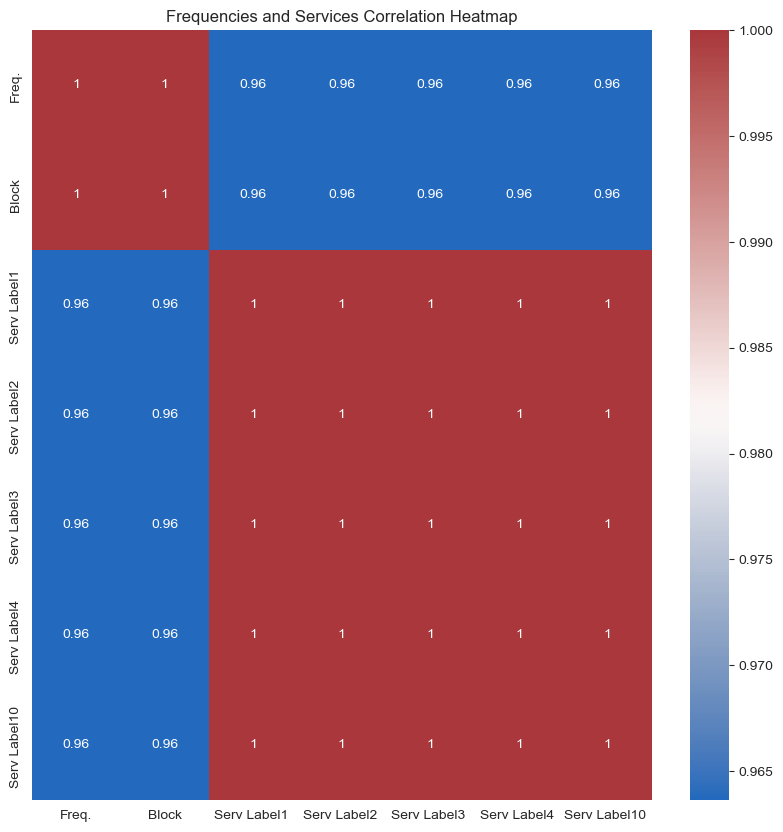

In [90]:
work_window.mainloop()